# Introduction to the `BrainGlobeAtlas` class

This notebook is modified from this one https://github.com/brainglobe/bg-atlasapi/blob/master/tutorials/Atlas%20API%20usage.ipynb.

# Install required packages

In [ ]:
!pip install bg-atlasapi

In [ ]:
!pip install itk itkwidgets ipywidgets

In [112]:
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

## 0. Creating a `BrainGlobeAtlas` object and list availabe options

To instantiate a `BrainGlobeAtlas` object, we need to instantiate it with the atlas name. The first time we use it, a version of this atlas files will be downloaded from the [remote GIN repository](http://gin.g-node.org/brainglobe/atlases) and stored on your local machine (by default, in .../Users/username/.brainglobe):

In [3]:
import numpy as np
from bg_atlasapi import BrainGlobeAtlas
from pprint import pprint

bg_atlas = BrainGlobeAtlas("allen_mouse_100um", check_latest=False)

Bgatlas_api: allen_mouse_100um not found locally. Downloading...

Output()

To know what atlases are available through BrainGlobe, we can use the `show_atlases` function (we need to be online):

In [4]:
from bg_atlasapi import show_atlases
show_atlases()

╭───────────────────────────────── Brainglobe Atlases ─────────────────────────────────╮
│                                                                           Latest     │
│  Name                              Downloaded  Updated  Local version    version     │
│  allen_mouse_100um                     ✔          ✔          1.2           1.2       │
│  example_mouse_100um                                                       1.2       │
│  allen_mouse_10um                                                          1.2       │
│  allen_mouse_25um                                                          1.2       │
│  allen_mouse_50um                                                          1.2       │
│  mpin_zfish_1um                                                            1.0       │
│  allen_human_500um                                                         0.1       │
│  kim_mouse_10um                                                            1.0       │
│  kim_mouse_25um                                                            1.0       │
│  kim_mouse_50um                                                            1.0       │
│  kim_mouse_100um                                                           1.0       │
│  osten_mouse_10um                                                          1.1       │
│  osten_mouse_25um                                                          1.1       │
│  osten_mouse_50um                                                          1.1       │
│  osten_mouse_100um                                                         1.1       │
│  allen_cord_20um                                                           1.0       │
│  azba_zfish_4um                                                            1.1       │
│  whs_sd_rat_39um                                                           1.0       │
│  perens_lsfm_mouse_20um                                                    1.0       │
│  admba_3d_e11_5_mouse_16um                                                 1.0       │
│  admba_3d_e13_5_mouse_16um                                                 1.0       │
│  admba_3d_e15_5_mouse_16um                                                 1.0       │
│  admba_3d_e18_5_mouse_16um                                                 1.0       │
│  admba_3d_p4_mouse_16.752um                                                1.0       │
│  admba_3d_p14_mouse_16.752um                                               1.0       │
│  admba_3d_p28_mouse_16.752um                                               1.0       │
│  admba_3d_p56_mouse_25um                                                   1.0       │
│  princeton_mouse_20um                                                      1.0       │
╰──────────────────────────────────────────────────────────────────────────────────────╯

## 1. Using a `BrainGlobe` atlas

A BrainGlobe atlas is a convenient API for interacting with an anatomical atlas. BrainGlobe atlases contain:
 * Metadata
 * The reference anatomical stack used for the registration itself
 * Region annotation stack (the segmented atlas image that occupies the same space as the reference stack)
 * Hemisphere annotation stack which denotes left and right
 * Description of the region hierarchy
 * Meshes for the regions

### 1.0 Metadata

All atlases have a standard set of medatata describing their source, species, resolution, etc:

In [5]:
bg_atlas.metadata

{'name': 'allen_mouse',
 'citation': 'Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007',
 'atlas_link': 'http://www.brain-map.org',
 'species': 'Mus musculus',
 'symmetric': True,
 'resolution': [100.0, 100.0, 100.0],
 'orientation': 'asr',
 'version': '1.2',
 'shape': [132, 80, 114],
 'trasform_to_bg': [[1.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 1.0]],
 'additional_references': []}

### 1.1 Anatomical, annotation and hemispheres stack

In [6]:
from matplotlib import pyplot as plt

Anatomical reference:

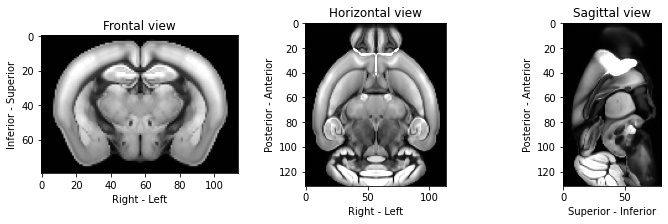

In [71]:
space = bg_atlas.space
stack = bg_atlas.reference

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    mid_index = stack.shape[i]//2
    axs[i].imshow(np.moveaxis(stack,i,0)[mid_index,:,:], cmap="gray",clim=(0,250))
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

Annotations stack:

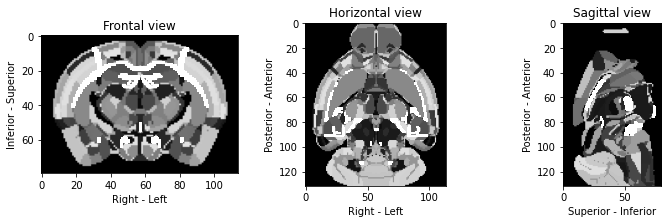

In [52]:
space = bg_atlas.space
stack = bg_atlas.annotation

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    mid_index = stack.shape[i]//2
    axs[i].imshow(np.moveaxis(stack,i,0)[mid_index,:,:], cmap="gray",clim=(0,1250))
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])


# Sagittal view

In [95]:
sag = np.moveaxis(stack, 2, 0)

In [117]:
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 2
    plt.imshow(np.fliplr(sag[layer,:, :]), cmap='gray');
    plt.title('Explore Layers of Mouse atlas', fontsize=20)
    plt.axis('off')
    return layer
interact(explore_3dimage, layer=(0, sag.shape[0] - 1));

interactive(children=(IntSlider(value=56, description='layer', max=113), Output()), _dom_classes=('widget-inte…

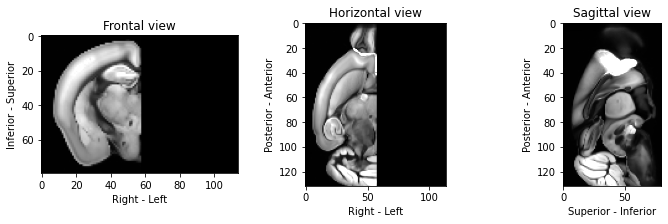

In [87]:
space = bg_atlas.space
stack_ = bg_atlas.hemispheres
stack_ = stack_ - 1
f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    mid_index = stack.shape[i]//2
    axs[i].imshow(np.moveaxis(stack * stack_,i,0)[mid_index,:,:], cmap="gray",clim=(0,250))
    #axs[i].imshow(stack[i], cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

### 1.2 Regions hierarchy

The atlas comes with the description of a hierarchy of brain structures. To have an overview:

In [10]:
bg_atlas.structures

root (997)
├── VS (73)
│   ├── AQ (140)
│   ├── V3 (129)
│   ├── V4 (145)
│   │   └── V4r (153)
│   ├── VL (81)
│   │   ├── SEZ (98)
│   │   └── chpl (108)
│   └── c (164)
├── fiber tracts (1009)
│   ├── cbf (960)
│   │   ├── arb (728)
│   │   ├── cbc (744)
│   │   └── cbp (752)
│   │       ├── icp (1123)
│   │       │   └── sctd (553)
│   │       ├── mcp (78)
│   │       └── scp (326)
│   │           ├── dscp (812)
│   │           ├── sctv (866)
│   │           └── uf (850)
│   ├── cm (967)
│   │   ├── IIIn (832)
│   │   │   ├── mlf (62)
│   │   │   └── pc (158)
│   │   ├── IIn (848)
│   │   │   ├── bsc (916)
│   │   │   ├── csc (336)
│   │   │   ├── och (117)
│   │   │   └── opt (125)
│   │   ├── IVn (911)
│   │   ├── In (840)
│   │   │   ├── aco (900)
│   │   │   ├── lotg (21)
│   │   │   │   ├── lot (665)
│   │   │   │   └── lotd (538)
│   │   │   └── onl (1016)
│   │   ├── VIIIn (933)
│   │   │   ├── cVIIIn (948)
│   │   │   │   ├── bic (482)
│   │   │   │   ├── cic (633)
│   │   

The structures attribute is a custom dictionary that can be queried by region number or acronym, and contains all the information for a given structure:

In [11]:
pprint(bg_atlas.structures["root"])

{'acronym': 'root',
 'id': 997,
 'mesh': None,
 'mesh_filename': PosixPath('/root/.brainglobe/allen_mouse_100um_v1.2/meshes/997.obj'),
 'name': 'root',
 'rgb_triplet': [255, 255, 255],
 'structure_id_path': [997]}


In particular, the `structure_id_path` key contains a list description of the path in the hierarchy up to a particular region, and can be used for queries on the hierarchy.

In [12]:
bg_atlas.structures["CH"]["structure_id_path"]

[997, 8, 567]

We can use the `bg_atlas.get_structure_descendants` and `bg_atlas.get_structure_ancestors` methods to explore the hierarchy:

In [13]:
bg_atlas.get_structure_descendants("VISC")

['VISC1', 'VISC2/3', 'VISC4', 'VISC5', 'VISC6a', 'VISC6b']

In [ ]:
bg_atlas.get_structure_ancestors("VISC6a")

['root', 'grey', 'CH', 'CTX', 'CTXpl', 'Isocortex', 'VISC']

---
**NOTE**: 
the levels of the hierarchy depends on the underlying atlas, so we cannot ensure the goodness and consistency of their hierarchy three.
---

There is an higher level description of the structures hierarchy that is built using the [treelib](https://treelib.readthedocs.io/en/latest/) package, and is available as: 

In [14]:
bg_atlas.structures.tree

For most applications though the methods described above and the list path of each region should be enough to query the hierarchy without additional layers of complication.

### 1.3 Region masks

The `get_structure_mask` method returns a mask volume where all voxels belonging to an area or to the descendants of that area are non zero. All other voxels are zero. We will generate the structure mask for primary visual cortex to see how this works. 

Primary visual cortex (`VISp`) has an ID value of `385` but no voxels in the annotation image actually have that value:

In [15]:
pprint(bg_atlas.structures["VISp"])

{'acronym': 'VISp',
 'id': 385,
 'mesh': None,
 'mesh_filename': PosixPath('/root/.brainglobe/allen_mouse_100um_v1.2/meshes/385.obj'),
 'name': 'Primary visual area',
 'rgb_triplet': [8, 133, 140],
 'structure_id_path': [997, 8, 567, 688, 695, 315, 669, 385]}


In [16]:
# No voxels in the annotation volume are labelled as being VISp
(bg_atlas.annotation==385).sum()

0

The reason no VISp voxels exist is because the annotation volume is segmented more finely. In this case `VISp` is divided into cortical layers and it is IDs associated with these layers that are present in the annotation volume.

In [17]:
# The descendants (children) of VISp are cortical layers
bg_atlas.get_structure_descendants("VISp")

['VISp1', 'VISp2/3', 'VISp4', 'VISp5', 'VISp6a', 'VISp6b']

In [18]:
# The IDs associated with each layer in primary visual cortex
layers = bg_atlas.get_structure_descendants("VISp")
layer_ids = [bg_atlas.structures[this_layer]['id'] for this_layer in layers]

for (this_layer, this_id) in zip(layers, layer_ids):
    print("%s\t%s" % (this_layer, this_id))



VISp1	593
VISp2/3	821
VISp4	721
VISp5	778
VISp6a	33
VISp6b	305


These IDs are indeed present in the annotation volume:

In [ ]:
# For example, we find over a thousand voxels associated with primary visual cortex layer 6
# in the annotation volume
(bg_atlas.annotation==778).sum()

1565

So lets use `get_structure_mask` to return a mask volume that retains only `VISp`.

In [19]:
mask_VISp = bg_atlas.get_structure_mask('VISp')

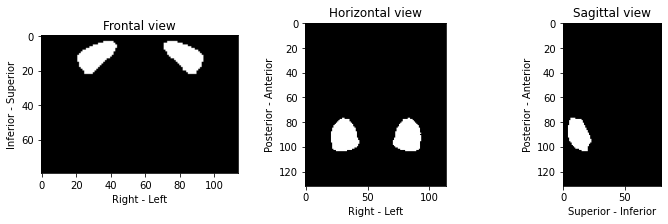

In [20]:
f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(mask_VISp.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])


The `root` node encompases the whole brain and we can use this to provide a background image for the above area.

In [21]:
mask_root = bg_atlas.get_structure_mask('root')

# The mask images have pixel values equal to the ID of the parent area, so we change these for
# plotting purposes. 
mask_root[mask_root>0]=5
mask_VISp[mask_VISp>0]=2
mask_VISp_root = mask_VISp + mask_root

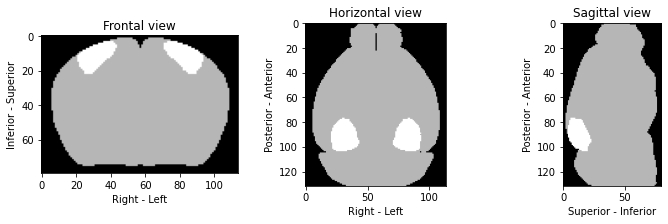

In [22]:
space = bg_atlas.space

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(mask_VISp_root.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])


### 1.3 Regions meshes

If we need to access the structure meshes, we can either query for the file (e.g., if we need to load the file through some library like `vedo`):

In [23]:
bg_atlas.meshfile_from_structure("CH")

PosixPath('/root/.brainglobe/allen_mouse_100um_v1.2/meshes/567.obj')

Or directly obtain the mesh, as a mesh object of the `meshio` library:

In [24]:
bg_atlas.mesh_from_structure("CH")

<meshio mesh object>
  Number of points: 56703
  Number of cells:
    triangle: 112948
  Point data: obj:vn
  Cell data: obj:group_ids

## 2 Query the `BrainGlobeAtlas`

### 2.0 Query for structures:

A very convenient feature of the `BrainGlobeAtlas` API is the simplicity of querying for the identity of the structure or the hemisphere at a given location, either from stack indexes or space coordinates, and even cutting the hierarchy at some higher level:

In [25]:
# Ask for identity of some indexes in the stack:
print("By index:", bg_atlas.structure_from_coords((50, 40, 30), 
                                                  as_acronym=True))

# Now give coordinates in microns
print("By coordinates:", bg_atlas.structure_from_coords((5000, 4000, 3000), 
                                                        as_acronym=True, 
                                                        microns=True))

# Now cut hierarchy at some level
print("Higher hierarchy level:", bg_atlas.structure_from_coords((5000, 4000, 3000), 
                                                                 as_acronym=True, 
                                                                 microns=True, 
                                                                 hierarchy_lev=2))

By index: CP
By coordinates: CP
Higher hierarchy level: CH


### 2.1 Query for hemispheres

A very similar method can be used for hemispheres. 0 correspond to outside the brain, a,d 1 and 2 to left and right hemispheres - but we can just ask for the side name instead of the number:

In [26]:
# Ask for identity of some indexes in the stack:
print("By index:", bg_atlas.hemisphere_from_coords((50, 40, 30)))

# Now give coordinates in microns
print("By coordinates:", bg_atlas.hemisphere_from_coords((5000, 4000, 3000), microns=True))

# Now print side string
print("By :", bg_atlas.hemisphere_from_coords((5000, 4000, 3000), microns=True))

By index: 2
By coordinates: 2
By : 2
